In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import MaxPooling2D, Flatten
from sklearn.tree import DecisionTreeClassifier, plot_tree

from matplotlib.image import imread as LOAD
from matplotlib.pyplot import imshow as SHOW

from sklearn.model_selection import train_test_split

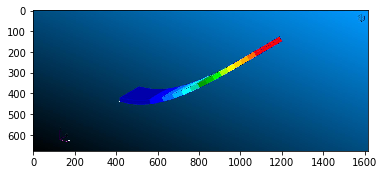

In [2]:
name = "h1 (1)"
path = "Database/IMAGES/"

img = LOAD(path+name+".jpg")
plt.figure(1)
SHOW(img)

Nombre de maxpooling : 4
Dimensions : (42, 100, 3)
Nombre d'éléments : 12600


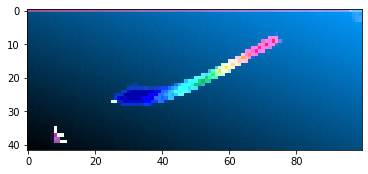

In [3]:
def prep(image, nb_iter=4, flat=True):
    sortie = MaxPooling2D()(np.array([image]))
    
    if nb_iter <= 0 :
        nb_iter = 1
    for i in range(nb_iter-1) :
        sortie = MaxPooling2D()(sortie)
    
    if flat == True :
        sortie = Flatten()(sortie)
    else :
        # prêt pour affichage comme image
        sortie = sortie.numpy()[0,:,:,:]
    return (sortie)

nb_pool_max = 9
nb_pool = 4
if nb_pool <= nb_pool_max :
    test = prep(img, nb_iter=nb_pool, flat=False)
    dims = test.shape
    nb_element = 1
    for dim in dims :
        nb_element *= dim
    print ("Nombre de maxpooling : {}\nDimensions : {}".format(nb_pool, dims))
    print ("Nombre d'éléments : {}".format(nb_element))
SHOW(test)

In [4]:
DB = []
DB_flat = []
Y = []
Y_type = []

craktype = ["h", "s", "t"]
supp_h = ["1", "2", "4", "6", "k"]
supp_t = ["10_2", "10_4", "10_6",
          "18_2", "18_4", "18_6",
          "2_2", "2_3", "2_4", "2_6",
          "k"]
mode = []
for i in range(10) :
    mode.append(str(i+1))

for crak in craktype :
    supp = [""]
    if crak == "h" :
        supp = supp_h
    elif crak == "t" :
        supp = supp_t
    for supp_crak in supp :
        for i in mode :
            name = "{}{} ({})".format(crak, supp_crak, i)
            try :
                img = LOAD(path+name+".jpg")
            except :
                img = LOAD(path+name+".png")
                addition = np.zeros((6,1615,3))
                img = np.concatenate([addition,img],axis=0)
            DB.append(img)
            
            DB_flat.append(prep(img).numpy()[0])
            
            if crak == "s" :
                Y.append(1) # c'est sain
            else :
                Y.append(0) # c'est cassé
            
            Y_type.append(crak)


In [5]:
score_moyen = 0
nb_score = 500
for i in range(nb_score) :
    X_train,X_test,Y_train,Y_test = train_test_split(DB_flat, Y, test_size=0.3)
    Dt = DecisionTreeClassifier()
    Dt.fit(X_train, Y_train)
    score_moyen += Dt.score(X_test, Y_test)/nb_score

Différentiation d'un matériaux sain ou cassé
Précision moyenne sur 500 itération : 98.72%


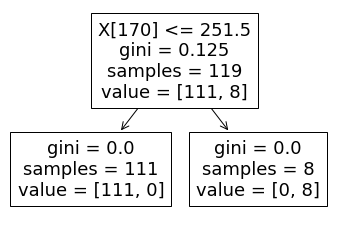

In [6]:
print ("Différentiation d'un matériaux sain ou cassé")
print ("Précision moyenne sur {} itération : {}%".format(nb_score, round(100*score_moyen, 2)))
plot_tree(Dt)
plt.grid() # sert à rien mais permet d'enlever tout le texte de sortie de la cellule

In [7]:
score_moyen_type = 0
for i in range(nb_score) :
    X_train,X_test,Y_train,Y_test = train_test_split(DB_flat, Y_type, test_size=0.3)
    Dt_type = DecisionTreeClassifier()
    Dt_type.fit(X_train, Y_train)
    score_moyen_type += Dt_type.score(X_test, Y_test)/nb_score

Différentiation des types de cassure
Précision moyenne sur 500 itération : 92.71%


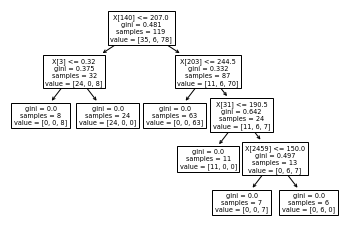

In [8]:
print ("Différentiation des types de cassure")
print ("Précision moyenne sur {} itération : {}%".format(nb_score, round(100*score_moyen_type, 2)))
plot_tree(Dt_type)
plt.grid()